# Exercice Arbre de décision

Dans le notebook précédent, nous avons montré comment fonctionne un arbre avec une profondeur de 1. Le but de cet exercice est de répéter une partie de l'expérience précédent pour une profondeur de 2 afin de montrer comment le processus de partitionnement se répète.



In [1]:
# chargement des données
import pandas as pd

df = pd.read_csv("penguins_classification.csv")
cs = ["Culmen Length (mm)", "Culmen Depth (mm)"]
y_column = "Species"

In [2]:
from sklearn.model_selection import train_test_split

X, Y = df[cs], df[y_column]
x_train,x_test, y_train, y_test = train_test_split(
    X, Y, random_state=0)

- Créez un arbre de décision avec une profondeur maximale de 2 niveaux.
- Ajuster le modèle sur les données d'apprentissage 
- Afficher les bornes de décision.
Pour tracer les bornes de décision vous pouvez réutiliser le code du notebook précédent.

#### **Model Application** 

In [4]:
# import model packages 
from sklearn.tree import DecisionTreeClassifier

# apply Decision Tree model 
tree = DecisionTreeClassifier(max_depth=2)

# fit the model to train data 
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

#### **Decesion Boundries** 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

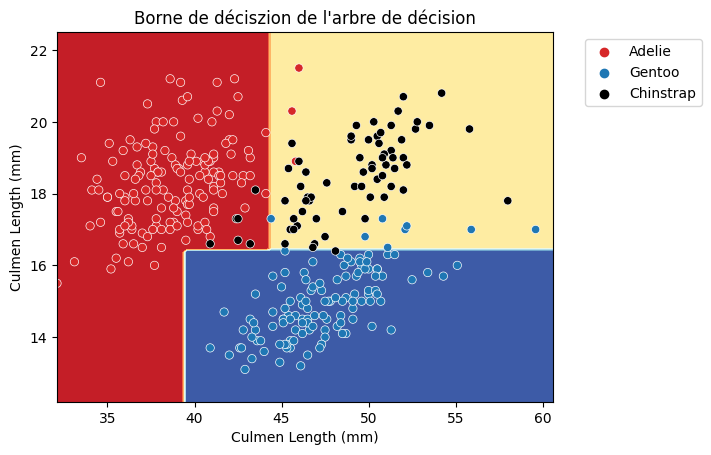

In [8]:
palette = ["tab:red", "tab:blue", "black"]

ax = plt.subplot(1, 1, 1)
DecisionBoundaryDisplay.from_estimator(
    tree,
    x_train,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel=cs[0],
    ylabel=cs[0]
)



sns.scatterplot(data=df, x=cs[0], y=cs[1],
                hue=Y, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Borne de déciszion de l'arbre de décision")

- Est ce que votre modèle à utiliser la variable  `Culmen Length `?
- Afficher l'arbre en utilisant  `sklearn.tree.plot_tree` 

Nous pouvons voir que The Decision Tree utilise à la fois Culmen Depth et Culmen Lenght parce que nous avons un séparateur horizontal et vertical mais nous pouvons aller profondément sur Tree 

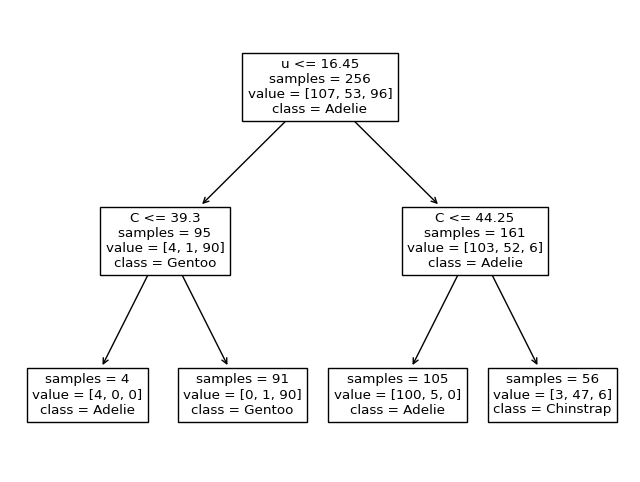

In [9]:
# import packages 
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=cs[0],
              class_names=tree.classes_, impurity=False, ax=ax)

Ici, nous pouvons voir que l’arbre divise le noeud racine en fonction de la profondeur culmn et ensuite pour les nouveaux noeuds nous pouvons voir que l’arbre les divise en fonction de la longueur culmn pour LC2 plus grand ou inférieur à 44,25 mm et pour LC1 (nouveau noeud 1) plus gros ou inférieur à 39,3 pour les nœuds foliaires que nous avons pour le nœud foliaire pur lf1 avec 4 échantillons pour **Adelie**, et le nœud foliaire mixte pour lf2 et la classe la plus commune est ***Gentoo** pour lf3 mcc est ***Adelie*** avec 100 échantillons, et le dernier nœud foliaire avec la Chinstrap de classe la plus commune avec un rang de 47 à 6,3 d’autres classes. 


Calculer l'accuracy de l'arbre de décision sur les données de test.

In [10]:
# import tree.fit(x_train, y_train)
test_score = tree.score(x_test, y_test)
print(f"Accuracy de l'arbre de décision: {test_score:.2f}")

Accuracy de l'arbre de décision: 0.97


De la haute précision que nous avons trouvée juste en ajoutant un pas plus loin en profondeur sur l’arbre de décision classificateur nous pouvons voir comment l’arbre de décision est bon pour ce genre de problèmes alors qu’il peut effectuer des tâches de classification et de régression.